In [1]:
pip install yfinance --user

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip show yfinance

Name: yfinance
Version: 0.2.18
Summary: Download market data from Yahoo! Finance API
Home-page: https://github.com/ranaroussi/yfinance
Author: Ran Aroussi
Author-email: ran@aroussi.com
License: Apache
Location: C:\Users\hp\AppData\Roaming\Python\Python311\site-packages
Requires: appdirs, beautifulsoup4, cryptography, frozendict, html5lib, lxml, multitasking, numpy, pandas, pytz, requests
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

google = yf.Ticker("GOOG")

In [4]:
df = google.history(period='1d', interval="1m")
print(df.head())

                                 Open        High         Low       Close   
Datetime                                                                    
2023-05-25 09:30:00-04:00  125.209999  125.980003  125.180000  125.699997  \
2023-05-25 09:31:00-04:00  125.699997  125.779999  124.877502  125.019997   
2023-05-25 09:32:00-04:00  125.019997  125.434196  124.889999  124.919998   
2023-05-25 09:33:00-04:00  124.949997  125.290001  124.870003  125.099998   
2023-05-25 09:34:00-04:00  125.080002  125.110001  124.769997  125.110001   

                            Volume  Dividends  Stock Splits  
Datetime                                                     
2023-05-25 09:30:00-04:00  2210805        0.0           0.0  
2023-05-25 09:31:00-04:00   370352        0.0           0.0  
2023-05-25 09:32:00-04:00   271595        0.0           0.0  
2023-05-25 09:33:00-04:00   203465        0.0           0.0  
2023-05-25 09:34:00-04:00   163335        0.0           0.0  


In [5]:
df = google.history(period='1d', interval="1m")
df = df[['Low']]
df.head()

,Low
Datetime,
2023-05-25 09:30:00-04:00,125.180000
2023-05-25 09:31:00-04:00,124.877502
2023-05-25 09:32:00-04:00,124.889999
2023-05-25 09:33:00-04:00,124.870003
2023-05-25 09:34:00-04:00,124.769997


In [6]:
df['date'] = pd.to_datetime(df.index).time
df.set_index('date', inplace=True)
df.head()

,Low
date,
09:30:00,125.180000
09:31:00,124.877502
09:32:00,124.889999
09:33:00,124.870003
09:34:00,124.769997


In [7]:
X = df.index.values
y = df['Low'].values
# The split point is the 10% of the dataframe length
offset = int(0.10*len(df))
X_train = X[:-offset]
y_train = y[:-offset]
X_test  = X[-offset:]
y_test  = y[-offset:]

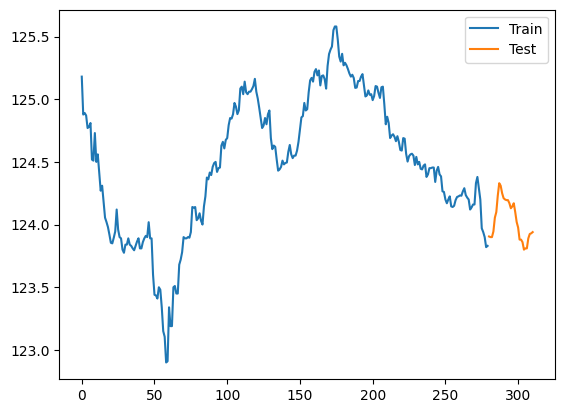

In [8]:
plt.plot(range(0,len(y_train)),y_train, label='Train')
plt.plot(range(len(y_train),len(y)),y_test,label='Test')
plt.legend()
plt.show()

In [11]:
print(f'Real data for time 0: {y_train[len(y_train)-1]}')
print(f'Real data for time 1: {y_test[0]}')


Real data for time 0: 123.83000183105469
Real data for time 1: 123.90499877929688
